Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8385 - loss: 0.5308 - val_accuracy: 0.9575 - val_loss: 0.1409
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9534 - loss: 0.1541 - val_accuracy: 0.9680 - val_loss: 0.1078
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9652 - loss: 0.1122 - val_accuracy: 0.9714 - val_loss: 0.0964
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9700 - loss: 0.0913 - val_accuracy: 0.9716 - val_loss: 0.0908
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9756 - loss: 0.0774 - val_accuracy: 0.9748 - val_loss: 0.0883
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9782 - loss: 0.0660 - val_accuracy: 0.9741 - val_loss: 0.0832
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9813 - loss: 0.0570 - val_accuracy: 0.9751 - val_loss: 0.0893
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9797 - loss: 0.0580 - 

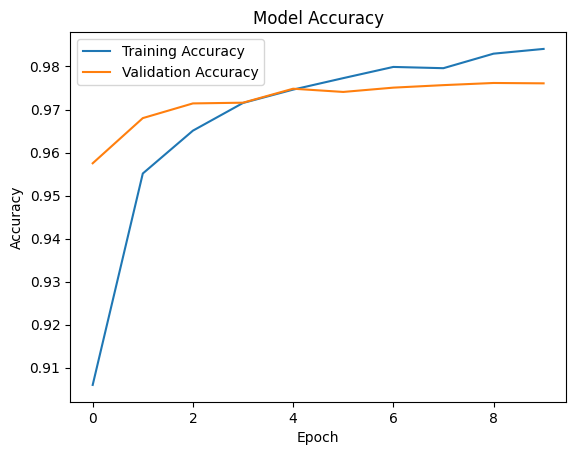

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


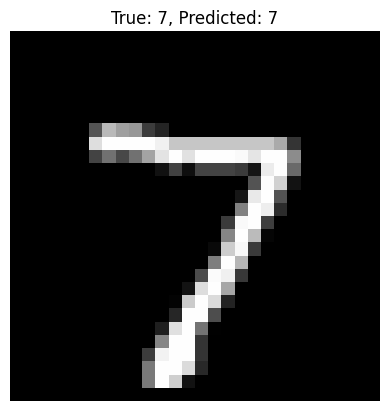

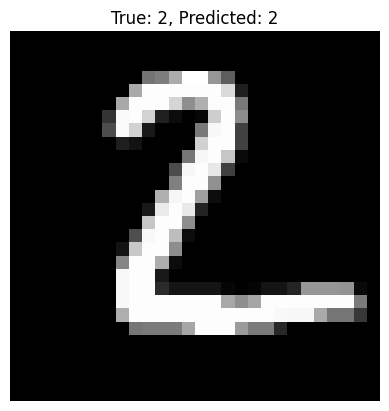

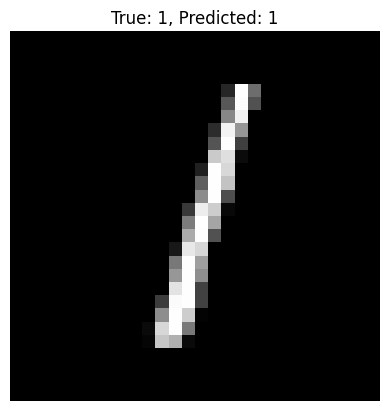

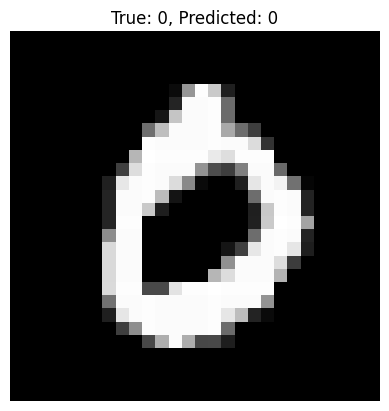

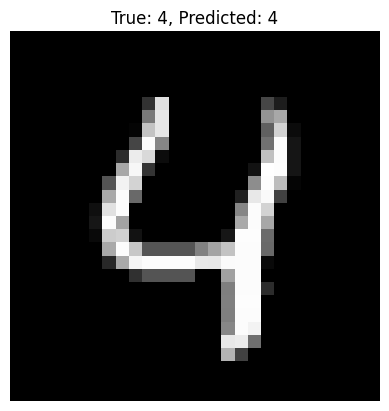

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0  # Normalize to range [0, 1]
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)  # One-hot encoding
y_test = to_categorical(y_test, 10)



model = Sequential([
    Flatten(input_shape=(28, 28)),         # Flatten the 28x28 images
    Dense(128, activation='relu'),        # First hidden layer
    Dropout(0.2),                         # Dropout to reduce overfitting
    Dense(64, activation='relu'),         # Second hidden layer
    Dense(10, activation='softmax')       # Output layer (10 classes)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=32)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

predictions = model.predict(x_test)

import numpy as np
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


Task 1

Loading MNIST dataset from TensorFlow...
Shape of input data (X): (60000, 784)
Shape of target data (y): (60000,)


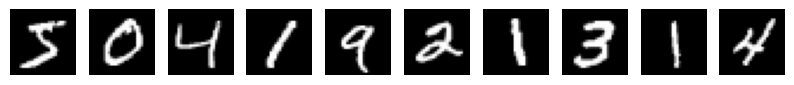

Training set size: 48000
Validation set size: 12000


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Validation Accuracy: 0.9678333333333333
Precision: 0.97, Recall: 0.97, F1 Score: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


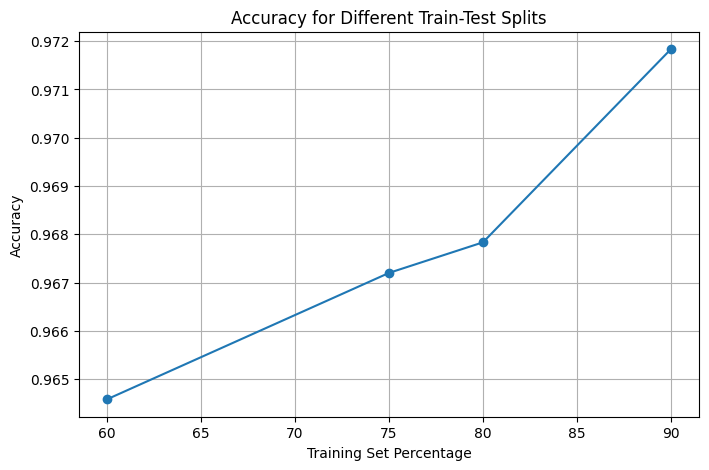

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


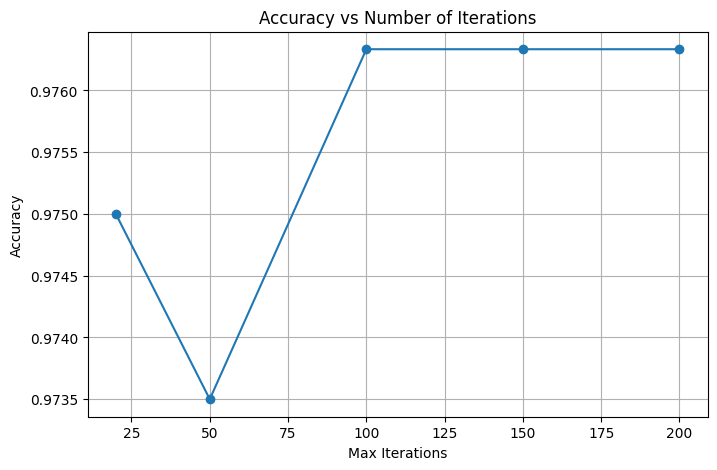

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tensorflow.keras.datasets import mnist

# Q1: Load MNIST dataset from TensorFlow
print("Loading MNIST dataset from TensorFlow...")
(X, y), (X_test, y_test) = mnist.load_data()  # Automatically splits into train and test

# Q2: Reshape the dataset
# Reshape training and testing data to have 784 features (28x28 flattened)
X = X.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

print("Shape of input data (X):", X.shape)  # Should be (60000, 784)
print("Shape of target data (y):", y.shape)  # Should be (60000,)

# Q3: Display the top 10 images
X_images = X.reshape(-1, 28, 28)  # Reshape temporarily for visualization
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_images[i], cmap="gray")
    plt.axis("off")
plt.show()

# Q4: Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale to [0, 1]
X_test_scaled = scaler.transform(X_test)  # Scale test set

# Q6: Split the dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])

# Q7: Train an FFN model with one hidden layer and max_iter=10
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)
mlp.fit(X_train, y_train)

# Q8: Evaluate the model
y_pred = mlp.predict(X_val)

# A. Accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# B. Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

# Q9: Compare accuracy for different train-test splits
splits = [0.6, 0.75, 0.8, 0.9]
accuracies = []

for split in splits:
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=1 - split, random_state=42)
    mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_val)
    accuracies.append(accuracy_score(y_val, y_pred))

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot([int(split * 100) for split in splits], accuracies, marker='o')
plt.title("Accuracy for Different Train-Test Splits")
plt.xlabel("Training Set Percentage")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Q10: Play with iterations
iterations = [20, 50, 100, 150, 200]
iteration_accuracies = []

for max_iter in iterations:
    mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=max_iter, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_val)
    iteration_accuracies.append(accuracy_score(y_val, y_pred))

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(iterations, iteration_accuracies, marker='o')
plt.title("Accuracy vs Number of Iterations")
plt.xlabel("Max Iterations")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


In [6]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_flattened = x_train.reshape(x_train.shape[0], -1)  
x_test_flattened = x_test.reshape(x_test.shape[0], -1)   

# Concatenate train and test inputs
x_combined = np.concatenate([x_train_flattened, x_test_flattened], axis=0)  
# Concatenate train and test targets
y_combined = np.concatenate([y_train, y_test], axis=0)  

# Print shapes
print(f"Shape of input data: {x_combined.shape}")  
print(f"Shape of target data: {y_combined.shape}")  


Shape of input data: (70000, 784)
Shape of target data: (70000,)


#Task 2

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import time

# Load and preprocess the MNIST dataset
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    # Normalize the data
    x_train, x_test = x_train / 255.0, x_test / 255.0
    # Convert labels to one-hot encoding
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

# Build a simple neural network
def build_model(input_shape, num_nodes, num_layers, activations):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))  # Flatten input (28x28 -> 784)
    
    # Add hidden layers
    for i in range(num_layers):
        model.add(Dense(num_nodes, activation=activations[i] if len(activations) > i else "relu"))
    
    # Add output layer
    model.add(Dense(10, activation="softmax"))  # Output layer for 10 classes
    return model

# Train and evaluate the model
def train_evaluate_model(model, x_train, y_train, x_test, y_test, epochs, batch_size=32):
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    start_time = time.time()
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)
    training_time = time.time() - start_time
    
    # Evaluate the model
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    # Calculate the number of parameters
    num_params = model.count_params()
    
    return train_acc, test_acc, num_params, training_time

# Main function to run experiments
def run_experiments():
    x_train, y_train, x_test, y_test = load_data()
    
    # Experiment configurations
    node_configs = [4, 32, 64, 128, 512, 2056]  # Number of nodes in the hidden layer
    layer_configs = [1, 4, 5, 6, 8, 16]  # Number of hidden layers
    activations = ["relu", "sigmoid", "tanh"]  # Activation function options
    
    print("Experiment: Varying number of nodes")
    for nodes in node_configs:
        model = build_model((28, 28), num_nodes=nodes, num_layers=1, activations=["relu"])
        train_acc, test_acc, num_params, train_time = train_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10)
        print(f"Nodes: {nodes}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {num_params}, Time: {train_time:.2f}s")
    
    print("\nExperiment: Varying number of layers")
    for layers in layer_configs:
        model = build_model((28, 28), num_nodes=64, num_layers=layers, activations=["relu"] * layers)
        train_acc, test_acc, num_params, train_time = train_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10)
        print(f"Layers: {layers}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {num_params}, Time: {train_time:.2f}s")
    
    print("\nExperiment: Varying activation functions")
    for activation in activations:
        model = build_model((28, 28), num_nodes=64, num_layers=4, activations=[activation] * 4)
        train_acc, test_acc, num_params, train_time = train_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10)
        print(f"Activation: {activation}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {num_params}, Time: {train_time:.2f}s")
    
    print("\nExperiment: Mixed activation functions (3 layers)")
    mixed_activations = [["sigmoid", "relu", "tanh"], ["relu", "tanh", "sigmoid"], ["tanh", "relu", "sigmoid"]]
    for activations in mixed_activations:
        model = build_model((28, 28), num_nodes=32, num_layers=3, activations=activations)
        train_acc, test_acc, num_params, train_time = train_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10)
        print(f"Activations: {activations}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {num_params}, Time: {train_time:.2f}s")

# Run the experiments
if __name__ == "__main__":
    run_experiments()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
Experiment: Varying number of nodes


c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Nodes: 4, Train Acc: 0.8757, Test Acc: 0.8733, Params: 3190, Time: 12.61s
Nodes: 32, Train Acc: 0.9837, Test Acc: 0.9681, Params: 25450, Time: 12.98s
Nodes: 64, Train Acc: 0.9907, Test Acc: 0.9737, Params: 50890, Time: 14.20s
Nodes: 128, Train Acc: 0.9964, Test Acc: 0.9798, Params: 101770, Time: 22.23s
Nodes: 512, Train Acc: 0.9981, Test Acc: 0.9827, Params: 407050, Time: 41.44s
Nodes: 2056, Train Acc: 0.9966, Test Acc: 0.9790, Params: 1634530, Time: 142.30s

Experiment: Varying number of layers
Layers: 1, Train Acc: 0.9933, Test Acc: 0.9727, Params: 50890, Time: 17.61s
Layers: 4, Train Acc: 0.9838, Test Acc: 0.9642, Params: 63370, Time: 21.56s
Layers: 5, Train Acc: 0.9921, Test Acc: 0.9750, Params: 67530, Time: 24.59s
Layers: 6, Train Acc: 0.9891, Test Acc: 0.9746, Params: 71690, Time: 25.24s
Layers: 8, Train Acc: 0.9861, Test Acc: 0.9694, Params: 80010, Time: 25.87s
Layers: 16, Train Acc: 0.9794, Test Acc: 0.9680, Params: 113290, Time: 34.63s

Experiment: Varying activation functions

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import time

# Load and preprocess MNIST data
def load_data(split_ratio=0.83):  # Default: 60k train, 10k test
    (x, y), _ = mnist.load_data()
    x = x / 255.0  # Normalize the images
    y = to_categorical(y, 10)  # One-hot encode labels
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(1 - split_ratio))
    return x_train, y_train, x_test, y_test

# Build model with layer-node combinations
def build_model(input_shape, layer_nodes):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))  # Input layer (28x28 -> 784)
    for nodes in layer_nodes:
        model.add(Dense(nodes, activation="relu"))  # Hidden layers
    model.add(Dense(10, activation="softmax"))  # Output layer
    return model

# Train and evaluate the model
def train_evaluate_model(model, x_train, y_train, x_test, y_test, epochs, batch_size=32):
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    start_time = time.time()
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=0)
    training_time = time.time() - start_time
    
    # Evaluate model
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    # Count number of parameters
    num_params = model.count_params()
    
    return train_acc, test_acc, num_params, training_time

# Experiment 3: Layer-node combinations
def experiment_layer_node_combinations(x_train, y_train, x_test, y_test):
    print("\nExperiment: Layer-Node Combinations")
    layer_configs = [
        [256, 128, 64, 32],  # Larger layer first
        [128, 64, 32, 16],   # Gradual reduction
        [64, 64, 64, 64],    # Equal-sized layers
        [512, 256, 128, 64], # Large to small
        [32, 32, 32, 32]     # Small fixed size
    ]
    for config in layer_configs:
        model = build_model((28, 28), layer_nodes=config)
        train_acc, test_acc, num_params, train_time = train_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10)
        print(f"Config: {config}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {num_params}, Time: {train_time:.2f}s")

# Experiment 4: Varying Input Size
def experiment_input_size(x_train, y_train, x_test, y_test):
    print("\nExperiment: Varying Input Size")
    input_sizes = [(28, 28), (14, 14), (7, 7)]  # Different image sizes
    
    for size in input_sizes:
        # Resize input data
        x_train_resized = tf.image.resize(x_train[..., tf.newaxis], size).numpy()
        x_test_resized = tf.image.resize(x_test[..., tf.newaxis], size).numpy()
        
        # Ensure the resized data is consistent with labels
        input_shape = (size[0], size[1], 1)
        model = build_model(input_shape=input_shape, layer_nodes=[256, 256, 256, 256])
        
        train_acc, test_acc, num_params, train_time = train_evaluate_model(
            model, x_train_resized, y_train, x_test_resized, y_test, epochs=10
        )
        print(f"Input Size: {size}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {num_params}, Time: {train_time:.2f}s")

# Experiment 5: Dataset Split
def experiment_dataset_split():
    print("\nExperiment: Dataset Split")
    split_ratios = [0.5, 0.7, 0.9]  # Train-test splits (e.g., 50% train, 50% test)
    
    for ratio in split_ratios:
        x_train, y_train, x_test, y_test = load_data(split_ratio=ratio)
        
        model = build_model((28, 28), layer_nodes=[64, 64, 64, 64])
        train_acc, test_acc, num_params, train_time = train_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=10)
        print(f"Split Ratio: {ratio}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Params: {num_params}, Time: {train_time:.2f}s")

# Run experiments
if __name__ == "__main__":
    x_train, y_train, x_test, y_test = load_data()
    
    # Run point 3: Layer-node combinations
    experiment_layer_node_combinations(x_train, y_train, x_test, y_test)
    
    # Run point 4: Varying input size
    experiment_input_size()
    
    # Run point 5: Dataset split
    experiment_dataset_split()



Experiment: Layer-Node Combinations
Config: [256, 128, 64, 32], Train Acc: 0.9954, Test Acc: 0.9790, Params: 244522, Time: 28.96s
Config: [128, 64, 32, 16], Train Acc: 0.9916, Test Acc: 0.9697, Params: 111514, Time: 20.12s
Config: [64, 64, 64, 64], Train Acc: 0.9851, Test Acc: 0.9645, Params: 63370, Time: 15.77s
Config: [512, 256, 128, 64], Train Acc: 0.9946, Test Acc: 0.9770, Params: 575050, Time: 49.92s
Config: [32, 32, 32, 32], Train Acc: 0.9851, Test Acc: 0.9648, Params: 28618, Time: 15.63s


TypeError: experiment_input_size() missing 4 required positional arguments: 'x_train', 'y_train', 'x_test', and 'y_test'

In [5]:
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Point 4: Define the model and train with the entire training dataset
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0, validation_data=(x_test, y_test))
end_time = time.time()

train_acc1 = history1.history['accuracy'][-1]
test_acc1 = history1.history['val_accuracy'][-1]
print(f"Full Dataset Model - Parameters: {model1.count_params()}, Train Acc: {train_acc1:.4f}, Test Acc: {test_acc1:.4f}, Time: {end_time - start_time:.2f} sec")

# Point 5: Train models on dataset splits
splits = [(50000, 20000), (40000, 30000)]
results_splits = []

for train_size, test_size in splits:
    # Create training and testing splits
    x_train_split = x_train[:train_size]
    y_train_split = y_train[:train_size]
    x_test_split = x_train[train_size:train_size + test_size]
    y_test_split = y_train[train_size:train_size + test_size]

    # Define a smaller model for faster training
    model2 = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model on the split dataset
    start_time = time.time()
    history2 = model2.fit(x_train_split, y_train_split, epochs=10, batch_size=128, verbose=0, validation_data=(x_test_split, y_test_split))
    end_time = time.time()

    train_acc2 = history2.history['accuracy'][-1]
    test_acc2 = history2.history['val_accuracy'][-1]
    results_splits.append((train_size, test_size, train_acc2, test_acc2, end_time - start_time))

# Print results for each dataset split
print("\nDataset Split - Results:")
for result in results_splits:
    print(f"Train Size: {result[0]}, Test Size: {result[1]}, Train Acc: {result[2]:.4f}, Test Acc: {result[3]:.4f}, Time: {result[4]:.2f} sec")


Full Dataset Model - Parameters: 400906, Train Acc: 0.9919, Test Acc: 0.9786, Time: 20.62 sec

Dataset Split - Results:
Train Size: 50000, Test Size: 20000, Train Acc: 0.9905, Test Acc: 0.9751, Time: 8.35 sec
Train Size: 40000, Test Size: 30000, Train Acc: 0.9913, Test Acc: 0.9700, Time: 8.42 sec
